#### This script can be used to calculate frequencies of #hashtags and words used in the EXIST2021 dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import emoji
import re
from collections import Counter
import itertools
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dslijepcevic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dslijepcevic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Function definitions

In [2]:
# extract_hashtags: provides a list with all hashtags that are used in the dataset (excluding stopwords and urls)
def extract_hashtags(text):
    # initializing hashtag_list variable
    hashtag_list = []
    
    for tweets in text:
    # splitting the text into words
        for word in tweets.split():
            # checking the first charcter of every word
            if word[0] == '#':
                if len(word[1:].split('#')) > 1:
                    # check if concatenation of hashtags
                    for w in word[1:].split('#'): 
                        if w != '#':
                            # adding the word to the hashtag_list
                            # remove https --> https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
                            hashtag_list.append(re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', w).strip('.,"').lower()) 
                else:
                    # adding the word to the hashtag_list
                    # remove https --> https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
                    hashtag_list.append(re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', word[1:]).strip('.,"').lower())#word[1:])
    return hashtag_list

In [3]:
#https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47

#print(stopwords.words('english'))
#print(stopwords.words('spanish'))

# extract_hashtags: provides a list with all words that are used in the dataset (excluding stopwords and urls)
def extract_words(text, language):
    # initializing hashtag_list variable
    word_list = []
    
    for tweets in text:
        # removing urls
        tweets = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweets.lower())
        # manually remove following punctuation
        tweets = re.sub(r'’|”|‘|“', ' ',tweets)
        # removing punctiation
        tweets = tweets.translate(str.maketrans('','',string.punctuation))        
        # tolenize
        text_tokens = word_tokenize(tweets)
                
        if language == 'en':
            tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
        elif language == 'es':
            tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('spanish')]
        else:
            print("Wrong language!")
            
        for word in tokens_without_sw:
            # adding the word to the list
            word_list.append(word)
    return word_list

In [4]:
# get_frequencies: used to determine frequencies of words in the corpus occuring in the dataset 
def get_frequencies(corpus, words):
    freq_dict = {}
    for word in corpus:
        freq_dict[word] = words.get(word, 0)
    return freq_dict        

In [5]:
# sort_dict: sort dictionary according to the values
def sort_dict(dictionary, reverse=False):
    sorted_tuples = sorted(dictionary.items(), key=lambda item: item[1], reverse=reverse)
    sorted_dict = {k: v for k, v in sorted_tuples}
    return sorted_dict

#### Data import

In [6]:
data_path = '../data/EXIST2021_training.tsv'

In [7]:
data = pd.read_csv(data_path, sep='\t', encoding='utf-8')
data.head()

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist


#### Emoji data in the provided dataset 

In [8]:
#for language in {'en', 'es'}:
#    print(language)
#    text = data.loc[data.language==language].text.values.astype(str)
#    all_chars = [char for tweet in text for char in tweet]
#    all_emojis = [char for char in all_chars if char in emoji.UNICODE_EMOJI]
#    print(all_emojis)

#### Loop over all tweets to generate dictionaries containing hashtags and all words (excluding stopwords and urls)

In [9]:
all_hashtags = []
tasks =[]
all_words = []

for language in {'en', 'es'}:
    print(language)
    for label in {'sexist', 'non-sexist'}:
        print(label)
        text = data.loc[(data.language==language)&(data.task1==label)].text.values.astype(str)
        hashtags = extract_hashtags(text)

        #hashtags
        hashtags_dict = {}
        for c in range(len(hashtags)):
            hashtags_dict[hashtags[c]] = hashtags.count(hashtags[c])
            
        sorted_hashtags_dict = sort_dict(hashtags_dict, reverse=True)
        print(sorted_hashtags_dict)
        print("\n")
        
        #all words
        words = extract_words(text, language)
        words_dict = {}
        for c in range(len(words)):
            words_dict[words[c]] = words.count(words[c])

        sorted_words_dict = sort_dict(words_dict, reverse=True)
        
        all_hashtags.append(sorted_hashtags_dict)
        tasks.append((language, label))
        all_words.append(sorted_words_dict)

es
sexist
{'lamanada': 17, 'mgtow': 15, 'notallmen': 12, 'metoo': 9, 'yositecreo': 7, 'rationalmale': 6, 'andrósfera': 5, 'redpill': 5, 'bájalasdelpedestal': 4, 'feminismo': 4, 'machismo': 3, 'masculinidad': 3, 'yosítecreoel': 2, 'pildoraroja': 2, 'lacasafuerte20': 2, 'sexomentirasycynthiasdevideo': 2, 'operacionantipulpo': 2, 'opinión': 2, 'fuerapato': 1, 'notallmen:': 1, 'lunes': 1, 'feliziniciodesemana': 1, 'tinyprettythings': 1, 'séviril': 1, 'feminazi': 1, 'lesbofobia': 1, 'nacional': 1, 'nalgaryt': 1, 'upav': 1, 'unidaddegénero': 1, 'feministas': 1, 'feminazissólo': 1, 'orcofemizurdascobarde': 1, 'mujeren': 1, 'larry': 1, 'bájaladelpedestal': 1, 'notallmense': 1, 'elif': 1, 'ucatólicacolocoloxcdf': 1, 'salvenalos2': 1, 'cennetnova1dic': 1, 'revocatoriaclaudialopez': 1, 'mesazaencasa': 1, 'podemoshablar': 1, 'sorprendente': 1, 'diego': 1, 'rosmello': 1, 'lacasafuerte14': 1, 'inegi': 1, 'violenciadegénero': 1, 'crímenes': 1, 'diaperdonaldtrump': 1, 'diosesabortero': 1, 'toscano': 1

en
sexist
{'mgtow': 30, 'everydaysexism': 24, 'patriarchy': 16, 'notallmen': 12, 'mensrights': 10, 'mensrightsmovement': 10, 'mensrightsactivist': 10, 'mensrightsmatter': 10, 'slut': 9, 'horny': 8, 'men': 8, 'womensrights': 8, 'feminism': 8, 'porn': 7, 'cock': 7, 'women': 7, 'cumtribute': 6, 'antifeminism': 6, 'antifeminist': 6, 'antifeminazi': 6, 'bbc': 6, 'guys': 6, 'boys': 6, 'feminist': 6, 'cumslut': 5, 'sex': 5, 'cum': 5, 'harassed': 5, 'nsfw': 5, 'feministshatemen': 5, 'feminismisawful': 5, 'feminismiscancer': 5, 'milf': 5, 'nude': 4, 'feminismismisandry': 4, 'hotwife': 4, 'rhop': 4, 'sext': 3, 'trade': 3, 'pussy': 3, 'dmme': 3, 'hornydm': 3, 'dick': 3, 'nudes': 3, 'tease': 3, 'hornyaf': 3, 'hornymilf': 3, 'cocktribute': 3, 'gangbang': 3, 'fuck': 3, 'metoo': 3, 'redpill': 3, 'whore': 3, 'sexy': 3, 'bigtits': 3, 'covid19': 3, 'dm': 2, 'tribute': 2, 'fuckme': 2, 'usa': 2, 'misandry': 2, 'hmu': 2, 'straight': 2, 'fetish': 2, 'vaw': 2, 'panties': 2, 'desigirl': 2, 'desi': 2, 'desifuc

## Hashtags
#### Plots: all hashtags in tweets

In [10]:
all_hashtags

[{'lamanada': 17,
  'mgtow': 15,
  'notallmen': 12,
  'metoo': 9,
  'yositecreo': 7,
  'rationalmale': 6,
  'andrósfera': 5,
  'redpill': 5,
  'bájalasdelpedestal': 4,
  'feminismo': 4,
  'machismo': 3,
  'masculinidad': 3,
  'yosítecreoel': 2,
  'pildoraroja': 2,
  'lacasafuerte20': 2,
  'sexomentirasycynthiasdevideo': 2,
  'operacionantipulpo': 2,
  'opinión': 2,
  'fuerapato': 1,
  'notallmen:': 1,
  'lunes': 1,
  'feliziniciodesemana': 1,
  'tinyprettythings': 1,
  'séviril': 1,
  'feminazi': 1,
  'lesbofobia': 1,
  'nacional': 1,
  'nalgaryt': 1,
  'upav': 1,
  'unidaddegénero': 1,
  'feministas': 1,
  'feminazissólo': 1,
  'orcofemizurdascobarde': 1,
  'mujeren': 1,
  'larry': 1,
  'bájaladelpedestal': 1,
  'notallmense': 1,
  'elif': 1,
  'ucatólicacolocoloxcdf': 1,
  'salvenalos2': 1,
  'cennetnova1dic': 1,
  'revocatoriaclaudialopez': 1,
  'mesazaencasa': 1,
  'podemoshablar': 1,
  'sorprendente': 1,
  'diego': 1,
  'rosmello': 1,
  'lacasafuerte14': 1,
  'inegi': 1,
  'violen

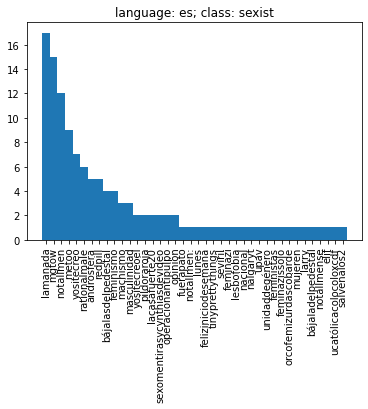

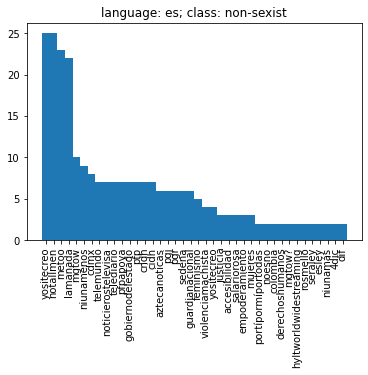

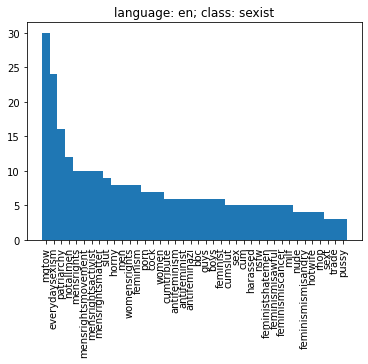

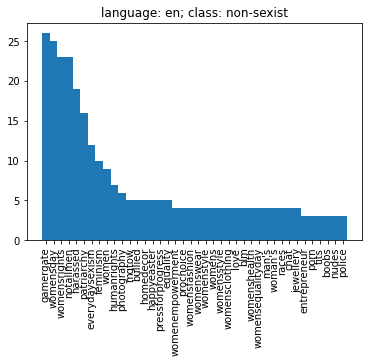

In [11]:
n = 40
for x in range(len(all_hashtags)):
    mylist = [key for key, val in dict(itertools.islice(all_hashtags[x].items(), n)).items() for _ in range(val)]
    plt.hist(mylist, np.arange(n+1)-0.5)
    plt.xticks(rotation=90)
    plt.title("language: {}; class: {}".format(tasks[x][0],tasks[x][1]))
    plt.show()


#### Absolute differences of utilized hashtags for the two languages  

In [12]:
differences_en = {x: abs(all_hashtags[0][x] - all_hashtags[1][x]) for x in all_hashtags[0] if x in all_hashtags[1]}
differences_es = {x: abs(all_hashtags[2][x] - all_hashtags[3][x]) for x in all_hashtags[2] if x in all_hashtags[3]}

In [13]:
sort_dict(differences_es, reverse=True)

{'mgtow': 25,
 'gamergate': 24,
 'womensrights': 15,
 'harassed': 14,
 'everydaysexism': 12,
 'notallmen': 11,
 'slut': 7,
 'horny': 7,
 'humanrights': 6,
 'men': 5,
 'cock': 5,
 'bbc': 5,
 'feminist': 5,
 'porn': 4,
 'cumslut': 4,
 'sex': 4,
 'cum': 4,
 'nsfw': 3,
 'nude': 3,
 'equality': 3,
 'blm': 3,
 'love': 3,
 'feminism': 2,
 'women': 2,
 'sext': 2,
 'pussy': 2,
 'dmme': 2,
 'fuck': 2,
 'redpill': 2,
 'whore': 2,
 'sexy': 2,
 'womenempowerment': 2,
 'twittersupport': 2,
 'dick': 1,
 'tease': 1,
 'metoo': 1,
 'dm': 1,
 'fuckme': 1,
 'misogyny': 1,
 'erotic': 1,
 'boobs': 1,
 'tits': 1,
 'funny': 1,
 'genderequality': 1,
 'christmas': 1,
 'lgbtq': 1,
 'patriarchy': 0,
 'nudes': 0,
 'covid19': 0,
 'wet': 0,
 'qatar': 0,
 'dickpic': 0,
 'onlyfans': 0,
 'intimidated': 0,
 'marriage': 0,
 'sjw': 0,
 '': 0,
 'gay': 0,
 'bi': 0,
 'babygirl': 0,
 'domesticviolence': 0,
 'blowjob': 0}

In [14]:
sort_dict(differences_en, reverse=True)

{'yositecreo': 18,
 'metoo': 14,
 'notallmen': 13,
 'niunamenos': 8,
 'lamanada': 5,
 'mgtow': 5,
 'redpill': 4,
 'machismo': 2,
 'feminismo': 1,
 'pildoraroja': 1,
 'lacasafuerte20': 1,
 'rosmello': 1,
 'abortolegalesvida': 1,
 'abortolegal2020': 1,
 'mgtow?': 1,
 'nacional': 0,
 'respeto': 0,
 'jaén': 0,
 '1lagentesiempre': 0,
 'volveriascontuexmega': 0}

#### Hashtags utilized in sexist tweets but not in non-sexist 

In [15]:
print("all hashtags that are in: " + str(tasks[0]) + ", but not in: " + str(tasks[1]))

{x: all_hashtags[0][x] for x in all_hashtags[0] if x not in all_hashtags[1]}

all hashtags that are in: ('es', 'sexist'), but not in: ('es', 'non-sexist')


{'rationalmale': 6,
 'andrósfera': 5,
 'bájalasdelpedestal': 4,
 'masculinidad': 3,
 'yosítecreoel': 2,
 'sexomentirasycynthiasdevideo': 2,
 'operacionantipulpo': 2,
 'opinión': 2,
 'fuerapato': 1,
 'notallmen:': 1,
 'lunes': 1,
 'feliziniciodesemana': 1,
 'tinyprettythings': 1,
 'séviril': 1,
 'feminazi': 1,
 'lesbofobia': 1,
 'nalgaryt': 1,
 'upav': 1,
 'unidaddegénero': 1,
 'feministas': 1,
 'feminazissólo': 1,
 'orcofemizurdascobarde': 1,
 'mujeren': 1,
 'larry': 1,
 'bájaladelpedestal': 1,
 'notallmense': 1,
 'elif': 1,
 'ucatólicacolocoloxcdf': 1,
 'salvenalos2': 1,
 'cennetnova1dic': 1,
 'revocatoriaclaudialopez': 1,
 'mesazaencasa': 1,
 'podemoshablar': 1,
 'sorprendente': 1,
 'diego': 1,
 'lacasafuerte14': 1,
 'inegi': 1,
 'violenciadegénero': 1,
 'crímenes': 1,
 'diaperdonaldtrump': 1,
 'diosesabortero': 1,
 'toscano': 1,
 'toscorp': 1,
 'mra': 1,
 'cazaesasesinato': 1,
 'huntingismurder': 1,
 'stopcaza': 1,
 'noalacaza': 1,
 'cazaessadismo': 1,
 'cazaescinismo': 1,
 'cazaesh

In [16]:
print("all hashtags that are in: " + str(tasks[2]) + ", but not in: " + str(tasks[3]))

{x: all_hashtags[2][x] for x in all_hashtags[2] if x not in all_hashtags[3]}

all hashtags that are in: ('en', 'sexist'), but not in: ('en', 'non-sexist')


{'mensrights': 10,
 'mensrightsmovement': 10,
 'mensrightsactivist': 10,
 'mensrightsmatter': 10,
 'cumtribute': 6,
 'antifeminism': 6,
 'antifeminist': 6,
 'antifeminazi': 6,
 'guys': 6,
 'boys': 6,
 'feministshatemen': 5,
 'feminismisawful': 5,
 'feminismiscancer': 5,
 'milf': 5,
 'feminismismisandry': 4,
 'hotwife': 4,
 'rhop': 4,
 'trade': 3,
 'hornydm': 3,
 'hornyaf': 3,
 'hornymilf': 3,
 'cocktribute': 3,
 'gangbang': 3,
 'bigtits': 3,
 'tribute': 2,
 'usa': 2,
 'misandry': 2,
 'hmu': 2,
 'straight': 2,
 'fetish': 2,
 'vaw': 2,
 'panties': 2,
 'desigirl': 2,
 'desi': 2,
 'desifuck': 2,
 'desisex': 2,
 'indian': 2,
 'indianwife': 2,
 'chudai': 2,
 'desiwife': 2,
 'indianslut': 2,
 'bollywood': 2,
 'indianpussy': 2,
 'desiwifeshare': 2,
 'desislut': 2,
 'desichudai': 2,
 'desipussy': 2,
 'indianhotwife': 2,
 'feminazi': 2,
 'gender': 2,
 'hornyteen': 2,
 'snapme': 2,
 'mra': 2,
 'sodomy': 2,
 'ass': 2,
 'sexism': 2,
 'history': 2,
 'naked': 2,
 'hardcock': 2,
 'wife': 2,
 'emmerdal

## All Words
#### Plots: all words in tweets

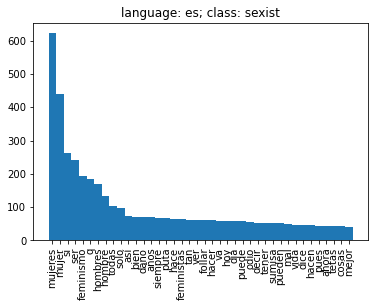

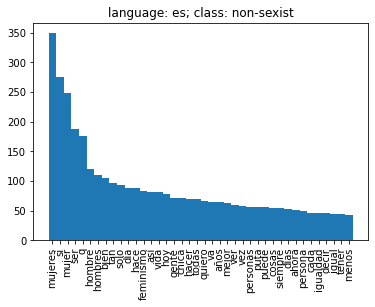

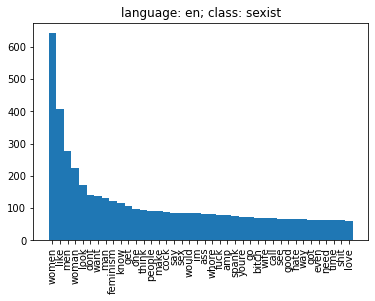

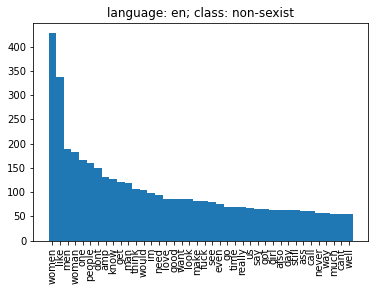

In [17]:
n = 40
for x in range(len(all_words)):
    mylist = [key for key, val in dict(itertools.islice(all_words[x].items(), 0, n)).items() for _ in range(val)]
    plt.hist(mylist, np.arange(n+1)-0.5)
    plt.xticks(rotation=90)
    plt.title("language: {}; class: {}".format(tasks[x][0],tasks[x][1]))
    plt.show()


## Harassment Lexicon (engl)
#### We calculated frequencies of words in the harassment lexicon defined in: https://github.com/Mrezvan94/Harassment-Corpus/blob/master/Harassment%20Lexicon.csv  . The used categories are: 'Sexual', 'Appearance', 'Intelligence', and  'Generic'.

In [18]:
# corpus: https://github.com/Mrezvan94/Harassment-Corpus/blob/master/Harassment%20Lexicon.csv

corpus_path = 'Harassment Lexicon.csv'
corpus = pd.read_csv(corpus_path, sep=',', encoding='utf-8')

In [19]:
corpus.head()

,Sexual,Racial,Appearance,Intelligence,Politics,Generic
0,amateur,abbo,alla,cockbite,anal,assbite
1,AnalAnnie,abo,big ass,Cockmuncher,anus,asscock
2,Angie,African Forklift,camel toe,demon,arse,asses
3,Aroused,Alligator Bait,Chesticles,demonrats,asian,assface
4,assblaster,arab,cock waffle,dickwad,ass-hat,asshat


In [20]:
corpus_selection = np.concatenate((corpus.Sexual.dropna().values, \
                                   corpus.Appearance.dropna().values, \
                                   corpus.Intelligence.dropna().values, \
                                   corpus.Generic.dropna().values))

In [21]:
all_freq = []

# loop over words that were collected for the engl. task in the list all_words 
# and sort them accourding to frequencies
en_task = [y for y, z in enumerate(tasks) if z[0] == 'en']
for x in en_task:
    freq = get_frequencies(corpus_selection, all_words[x])
    all_freq.append(sort_dict(freq, reverse=True))

#### Plots: most frequent words of Harassment Lexicon in the dataset

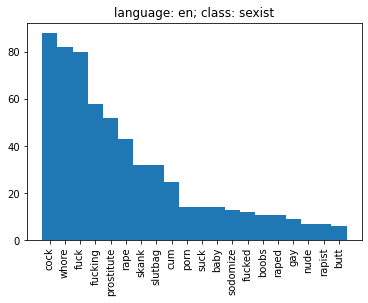

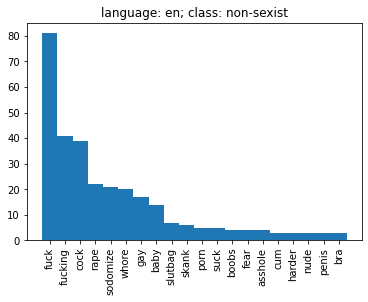

In [22]:
n = 20
for x in range(len(all_freq)):
    mylist = [key for key, val in dict(itertools.islice(all_freq[x].items(), 0, n)).items() for _ in range(val)]
    plt.hist(mylist, np.arange(n+1)-0.5)
    plt.xticks(rotation=90)
    plt.title("language: {}; class: {}".format(tasks[en_task[x]][0],tasks[en_task[x]][1]))
    plt.show()

#### words like 'whore' (n=82 vs. n=82), 'prostitute' (n=52 vs. n=2), 'cock' (n=88 vs. n= 39), 'slutbag' (n=32 vs. n=7) and 'skank' (n=32 vs. n=6) are more frequent in sexist tweets. In the following you can find the absolute differences:

In [23]:
differences = {x: abs(all_freq[0][x] - all_freq[1][x]) for x in all_freq[0] if x in all_freq[1]}

In [24]:
sort_dict(differences, reverse=True)

{'whore': 62,
 'prostitute': 50,
 'cock': 49,
 'skank': 26,
 'slutbag': 25,
 'cum': 22,
 'rape': 21,
 'fucking': 17,
 'fucked': 11,
 'raped': 10,
 'porn': 9,
 'suck': 9,
 'sodomize': 8,
 'gay': 8,
 'boobs': 7,
 'rapist': 6,
 'butt': 6,
 'milf': 6,
 'amateur': 5,
 'gangbang': 5,
 'fuckin': 5,
 'nude': 4,
 'fuckers': 4,
 'cumslut': 4,
 'escort': 3,
 'kinky': 3,
 'wank': 3,
 'bra': 2,
 'asses': 2,
 'titties': 2,
 'breast': 2,
 'coochie': 2,
 'fucker': 2,
 'fuckhead': 2,
 'masturbate': 2,
 'orgasm': 2,
 'playboy': 2,
 'pussies': 2,
 'snatch': 2,
 'dumbass': 2,
 'retard': 2,
 'babe': 2,
 'bastard': 2,
 'incest': 2,
 'moron': 2,
 'fuck': 1,
 'destroy': 1,
 'asshole': 1,
 'banging': 1,
 'blowjob': 1,
 'fuckme': 1,
 'harder': 1,
 'penis': 1,
 'sodomy': 1,
 'boobies': 1,
 'cumming': 1,
 'erection': 1,
 'fucka': 1,
 'fuckboy': 1,
 'genitals': 1,
 'goddamn': 1,
 'harem': 1,
 'molest': 1,
 'mothafuckin': 1,
 'motherfucker': 1,
 'pindick': 1,
 'slutty': 1,
 'transsexual': 1,
 'demon': 1,
 'shithead